<html>
    <body>
        <div align="center">
            <h3>NoteBook edited by Naïss Haïr SAID ALI</h3>
            <h1>TP TITANIC</h1>
        </div>
    </body>
</html>

![DataScience Process](images/datascience.svg)

In [1]:
import pandas as pd
from time import time

In [2]:
import sys
sys.path.insert(0, 
    '../data_Project_inphb/')

In [3]:
import firefly
firefly.__version__

'0.1.15'

In [4]:
from preprocessing.preprocessing import convert_columns, input_missing_values

# Importation of the dataset

In [5]:
titanic_train = pd.read_csv("../data/train.csv", sep = ',')
titanic_test = pd.read_csv("../data/test.csv", sep = ',')

# Part I --> Exploratory Data Analysis

In [6]:
titanic_train.shape

(891, 12)

In [7]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Comment
We note the presence of numerical and categorical variables. However, not all the values are filled in. These are missing values N/A

In [8]:
titanic_train.head(6)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q

*Target*
- **Survived**: whether the applicant defaulted (1) or not (0)?

*Features*
- **Pclass**: 
- **Name**: 
- **Sex**: 
- **Age**: 
- **SibSp** : 
- **Parch**: 
- **Ticket**: 
- **Fare**: 
- **Cabin**: 
- **Embarked**: 

In [9]:
titanic_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Comment
Here, we have the different modalities in each variable.

In [10]:
titanic_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# Part II --> Data preprocessing

## 2.1 Transformation of the base columns into their types

In [11]:
categorical_col = ["PassengerId", "Survived", "Pclass", "Name", "Sex", 
                   "SibSp", "Parch", "Ticket", "Cabin", "Embarked"]

In [12]:
numerical_col  = [var for var in titanic_train.columns if var not in categorical_col]

In [13]:
titanic_train = convert_columns(titanic_train, categorical_col, numerical_col)

In [14]:
titanic_train.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp           object
Parch           object
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2.2 Data Cleaning

In [15]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic_train = input_missing_values(titanic_train)

In [17]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

# Part III : Data Visualization

In [18]:
from visualization.visualization import nb_of_h_f_per_class, nb_of_h_f_per_Pclass_1, prize_of_ticket_per_Age
from visualization.visualization import nb_of_h_f_per_Embarked, nb_of_h_f, prize_of_ticket_per_SibSp
from visualization.visualization import more_analyse_1

## Number of men and women per class

In [19]:
nb_of_h_f_per_class(titanic_train)

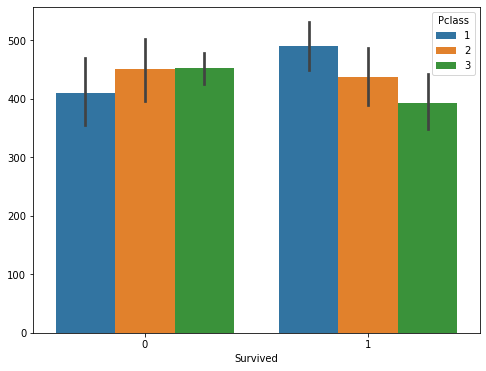

In [20]:
nb_of_h_f_per_Pclass_1(titanic_train)

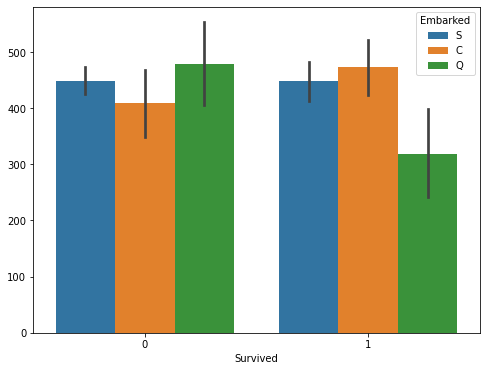

In [21]:
nb_of_h_f_per_Embarked(titanic_train)

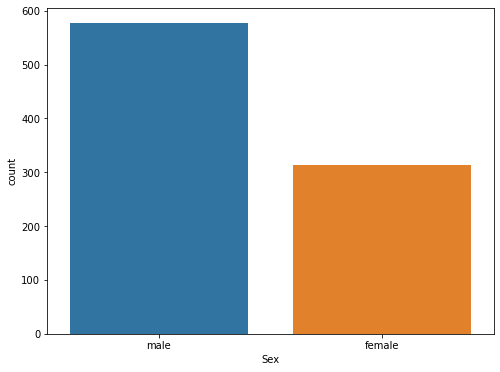

In [22]:
nb_of_h_f(titanic_train)

In [23]:
prize_of_ticket_per_SibSp(titanic_train)

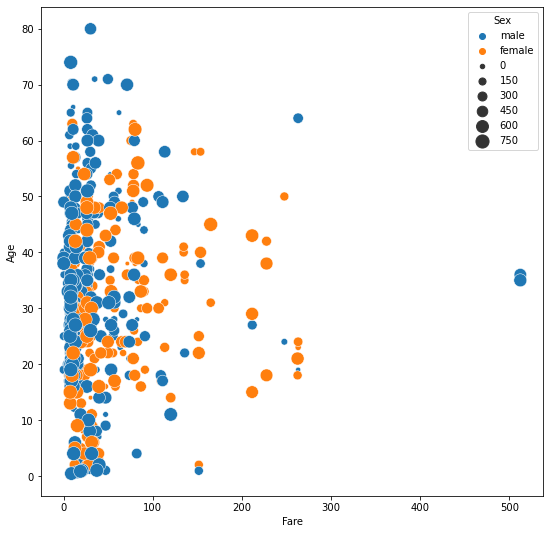

In [24]:
prize_of_ticket_per_Age(titanic_train)

<Figure size 648x648 with 0 Axes>

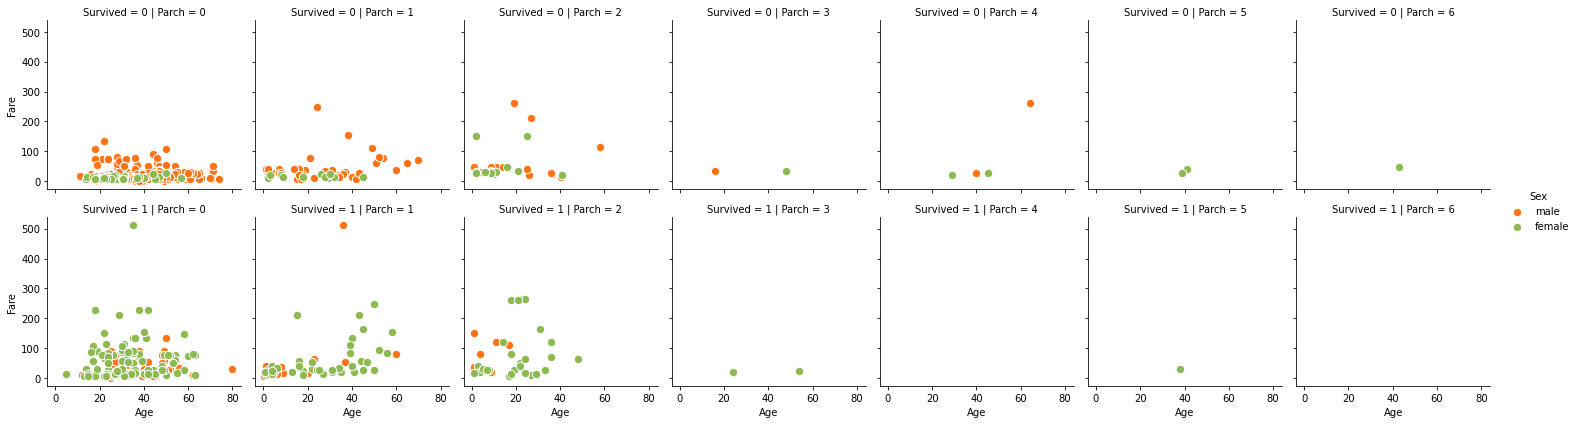

In [25]:
more_analyse_1(titanic_train)

# Part IV --> Feature Engineering and Machine Learning

In [26]:
from processing.model import parse_model_1, split_in_train_and_test_set
from processing.model import model_1_quick_logisticRegression, model_2_logisticRegression

## Model 1

Selection of variables needed for the model

In [27]:
model_1_cols = ['SibSp', 'Parch', 'Fare']

Subdivision of the base using the selected columns

In [28]:
%%time
X1, Y1 = parse_model_1(X = titanic_train.copy(), use_columns = model_1_cols)

CPU times: user 1.99 ms, sys: 0 ns, total: 1.99 ms
Wall time: 1.87 ms


Quick modelisation : logistics Regression

In [29]:
%%time
model_1_quick_logisticRegression(X1, Y1)

Accuracy [Logistic Regression with cv = 5] : 0.67 (+/- 0.09)
CPU times: user 554 ms, sys: 61.8 ms, total: 616 ms
Wall time: 1.46 s


## Model 2

Subdivision of the base in train and in test

In [30]:
%%time
X1_train, X1_test, Y1_train, Y1_test = split_in_train_and_test_set(X1, Y1, testSize = 0.2, randomState = 0)

CPU times: user 3.4 ms, sys: 205 µs, total: 3.61 ms
Wall time: 2.59 ms


Modelling : Logistic Regression

In [31]:
model_2_logisticRegression(X1_train, Y1_train, X1_test, Y1_test, save_model = False)

              precision    recall  f1-score   support

           0       0.69      0.94      0.79       110
           1       0.76      0.32      0.45        69

    accuracy                           0.70       179
   macro avg       0.72      0.63      0.62       179
weighted avg       0.71      0.70      0.66       179



{'score_train': 0.6643258426966292,
 'score_test': 0.6983240223463687,
 'model': LogisticRegression(),
 'metric': None}

Note that for Integer or None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. 
In all other cases, KFold is used.

## Model 3

In [32]:
from visualization.visualization import nb_of_h_f_per_Pclass_2

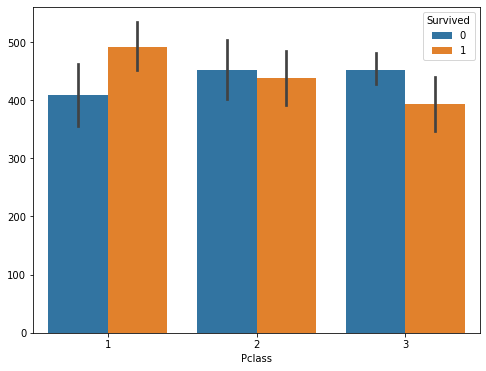

In [33]:
nb_of_h_f_per_Pclass_2(titanic_train)

In [34]:
from preprocessing.preprocessing import dummify_features

In [35]:
to_dummify = ["Pclass"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(titanic_train[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns = dummy_columns)

In [36]:
X1_1 = X1.join(X_dummy)

In [37]:
X1_1.head()

SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3
0      1      0   7.2500       0.0       0.0       1.0
1      1      0  71.2833       1.0       0.0       0.0
2      0      0   7.9250       0.0       0.0       1.0
3      1      0  53.1000       1.0       0.0       0.0
4      0      0   8.0500       0.0       0.0       1.0

In [38]:
from processing.model import model_3_quick_logisticRegression

In [39]:
%%time
model_3_quick_logisticRegression(X1_1, Y1, save_model = False)

Accuracy [Logistic Regression with cv = 5] : 0.69 (+/- 0.11)
CPU times: user 548 ms, sys: 117 µs, total: 548 ms
Wall time: 153 ms


We notice here that by enriching the features matrix a bit more, we improve the model score to 0.69 with a margin of error of +/- 0.11

## Model 4

In [40]:
from processing.model import model_4_quick_logisticRegression, parse_model_2

In [41]:
X2, Y2 = parse_model_2(titanic_train.copy())

In [42]:
model_4_quick_logisticRegression(X2, Y2, save_model = False)

Accuracy [Logistic Regression with cv = 5] : 0.79 (+/- 0.05)
           0         1         2           3         4         5         6  \
0        Age     SibSp     Parch        Fare  Pclass_1  Pclass_2  Pclass_3   
1 -0.0379433 -0.350395 -0.105541  0.00351828   1.19107  0.231945 -0.833454   

            7         8  
0  Sex_female  Sex_male  
1     1.64241  -1.05285  


## Choosing a Model 

To choose model for production, we will focus in the above concepts : 

1. Interpretability
2. Run-time
3. Model complexity
4. Scalability

# Part V --> Deployment of project

"What you build - you test, you ship and you maintain"

Once the final model has been selected, we need to ensure that other data application can access the model and use it in their process. This requires us to do two important tasks : 

- Serialising the Model (e.g. pickle, joblib)
- Serving the ML Model as a Service 

## Machine Learning as a service 

While we can package the model with the application and use it, it created tight coupling between the two. Everytime the model changes, the application will have to change. What if there are more than one application using the same model? 

It is lot simpler to deploy the ML model as a service exposing it's functionality through an HTTP API.

Note that the role of data scientist is to build a data-driven product !

Now that we have a prediction API, this can be consumed as part of many applications to provide insight and help in decision making.

- Dashboards 
- Web or Mobile Application 
- Internet of things Applications

## Start the Machine Learning Service 

Run the following command in your terminal in API's directory : 

     firefly -c config.yml

## Start HTTP API client : firefly

In [43]:
from firefly import Client

Access the predict function from the jupyter notebook

In [44]:
survived_default_api = Client("http://127.0.0.1:8000/", auth_token="naiss9")

Access to the predict function and start the ML Service 

In [45]:
survived_default_api.predict(SibSp = "1", Parch = "0", Fare = 7.25)

'This passenger is likely to die [0] with a probability of 27.05%'

# WE DIT IT !

It's the end of our modelization.
Now, we can deploy our model and API on production.

You can find this repository on my GitLab account @NaissHairOff with the name of project that used here **data-Project-inphb**.